In [10]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
from astropy.visualization import MinMaxInterval, AsinhStretch, ImageNormalize
from baobab import bnn_priors
from baobab.configs import Config, tdlmc_diagonal_config
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Visualizing the images

__Author:__ Ji Won Park (@jiwoncpark)
    
__Created:__ 8/30/19
    
__Last run:__ 9/05/19

In this notebook, we'll visualize the images generated with `DiagonalBNNPrior` via the configuration in `tdlmc_diagonal_config.py`.

In [11]:
cfg = Config.fromfile(tdlmc_diagonal_config.__file__)
out_data_dir = os.path.join('..', cfg.out_dir)
meta = pd.read_csv(os.path.join(out_data_dir, 'metadata.csv'), index_col=None)
bnn_prior = getattr(bnn_priors, cfg.bnn_prior_class)(cfg.bnn_omega, cfg.components)

In [12]:
img_files = [fname for fname in os.listdir(out_data_dir) if fname.endswith('.npy')]

In [13]:
# TODO: description, asinh scale...

In [14]:
meta.head()

,lens_mass_center_x,lens_mass_center_y,lens_mass_gamma,lens_mass_theta_E,lens_mass_e1,lens_mass_e2,external_shear_gamma_ext,external_shear_psi_ext,src_light_magnitude,src_light_center_x,...,magnification_3,x_image_0,x_image_1,x_image_2,x_image_3,y_image_0,y_image_1,y_image_2,y_image_3,n_img
0,2.075625e-07,9.201310e-08,2.028883,0.980937,0.359001,-0.370142,0.081424,5.936981,24.195606,-0.00047,...,-0.960963,0.3876,-0.416829,-0.753409,0.726166,0.907474,-0.862408,0.309188,-0.33053,4.0


lens_mass_center_x          2.075625e-07
lens_mass_center_y          9.201310e-08
lens_mass_gamma             2.028883e+00
lens_mass_theta_E           9.809373e-01
lens_mass_e1                3.590012e-01
lens_mass_e2               -3.701419e-01
external_shear_gamma_ext    8.142406e-02
external_shear_psi_ext      5.936981e+00
src_light_magnitude                  NaN
src_light_center_x         -4.698317e-04
src_light_center_y          1.820444e-02
src_light_n_sersic          1.346057e+00
src_light_R_sersic          5.776302e-01
src_light_e1                1.325958e-02
src_light_e2                2.182799e-01
lens_light_magnitude                 NaN
lens_light_center_x         2.075625e-07
lens_light_center_y         9.201310e-08
lens_light_n_sersic         3.126215e+00
lens_light_R_sersic         1.176984e+00
lens_light_e1               4.530198e-01
lens_light_e2               3.935152e-02
agn_light_magnitude         2.158845e+01
mag_0                       2.558268e+00
mag_1           

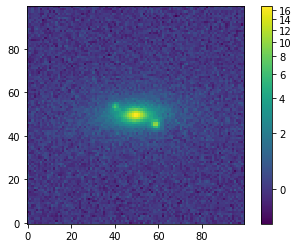

In [5]:
img_idx = 0

img_path = os.path.join(out_data_dir, img_files[img_idx])
img = np.load(img_path)

norm = ImageNormalize(img, interval=MinMaxInterval(), stretch=AsinhStretch())

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
im = ax.imshow(img, origin='lower', norm=norm)
fig.colorbar(im)

print(meta.iloc[img_idx])